<a href="https://colab.research.google.com/github/Rizkifadillah/latihan_supervised_learning/blob/main/05%20-%20Regression%20Evaluation/Part_6_Polynomial_Regression_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install luwiji

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease


# Import Data

In [ ]:
df_path = '/content/drive/MyDrive/course_ipynb/Kumpulan_dataset/taxi_fare.csv'
df = pd.read_csv(df_path, parse_dates=["pickup_datetime"])
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0


,missing_value,%
fare_amount,0,0.00
pickup_datetime,0,0.00
pickup_longitude,0,0.00
pickup_latitude,0,0.00
dropoff_longitude,0,0.00
dropoff_latitude,0,0.00
passenger_count,1,0.01


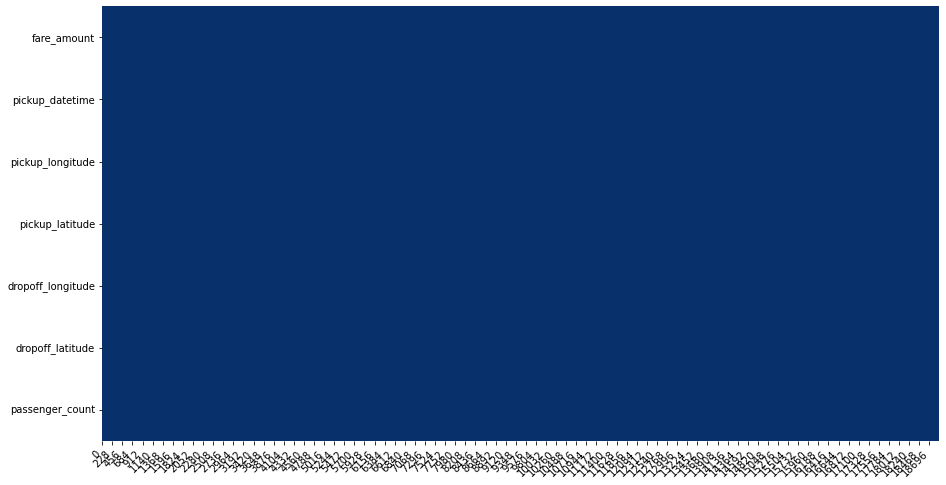

In [ ]:
plot_missing_value(df, return_df=True)

In [ ]:
df.dropna(inplace=True)

# Extract Time Feature

In [ ]:
pickup_dt = df.pickup_datetime.dt


In [ ]:
df['year'] = pickup_dt.year
df['month'] = pickup_dt.month
df['day'] = pickup_dt.dayofweek
df['hour'] = pickup_dt.hour
df.drop(columns="pickup_datetime", inplace=True)
df.head()


KeyError: ignored

In [ ]:
df.sample(3)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
11097,10.5,-73.984347,40.767475,-73.993737,40.743297,1.0,2013,12,6,11
13939,3.5,-74.006060,40.735297,-74.000617,40.740737,1.0,2014,5,3,19
12833,6.9,-73.976474,40.755232,-73.961894,40.775411,1.0,2009,12,0,13


# Extract Distance Feature

In [ ]:
df['distance'] = np.abs(df.pickup_longitude - df.dropoff_longitude) + np.abs(df.pickup_latitude - df.dropoff_latitude)
df.drop(columns=['pickup_longitude','dropoff_longitude','pickup_latitude','dropoff_latitude'], inplace=True)
df.head()

,fare_amount,passenger_count,year,month,day,hour,distance
0,4.5,1.0,2009,6,0,17,0.011742
1,16.9,1.0,2010,1,1,16,0.107481
2,5.7,2.0,2011,8,3,0,0.019212
3,7.7,1.0,2012,4,5,4,0.029386
4,5.3,1.0,2010,3,1,7,0.027194


# *Dataset Splitting*

In [ ]:
X = df.drop(columns="fare_amount") 
y = df.fare_amount 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((15134, 6), (3784, 6), (15134,), (3784,))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

In [ ]:
X_train.head()

,passenger_count,year,month,day,hour,distance
7539,1.0,2011,6,1,22,0.000000
578,3.0,2010,3,3,10,0.009293
8056,5.0,2010,4,0,8,0.048951
11761,1.0,2014,11,0,22,0.027145
15531,1.0,2012,12,5,13,0.010498


In [ ]:
preprocessor = ColumnTransformer([
    ("numeric", num_pipe(poly=2), ["passenger_count","year","distance"]),
    ("categoric", cat_pipe(encoder='onehot'), ["month", "day","hour"])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LinearRegression())
])


model = GridSearchCV(pipeline, gsp.linreg_poly_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'algo__fit_intercept': True, 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
0.02308676204052995 0.015617876952278453 0.019173475758183622


# *Phase 2: Feature Importance*

Jangan lakukan feature importance kalau score kita masih parah

# Evaluation

Actualy vs Prediction Plot

In [ ]:
from jcopml.plot import plot_actual_vs_prediction, plot_residual

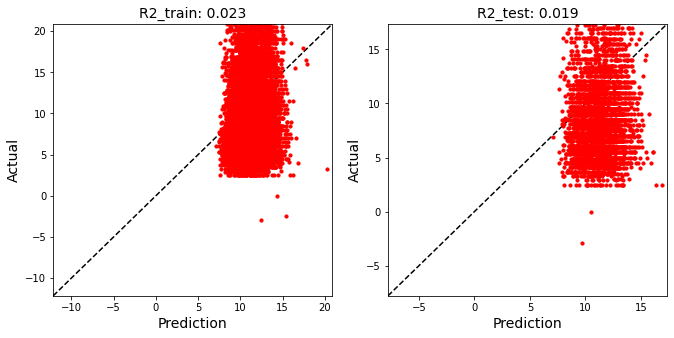

In [ ]:
plot_actual_vs_prediction(X_train, y_train, X_test, y_test, model)

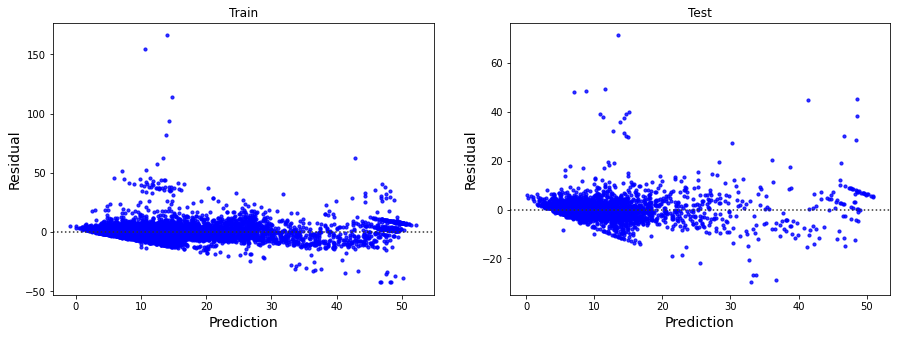

In [ ]:
plot_residual(X_train, y_train, X_test, y_test, model)

In [ ]:
gsp.linreg_poly_params

{'prep__numeric__poly__degree': [1, 2, 3],
 'prep__numeric__poly__interaction_only': [True, False],
 'algo__fit_intercept': [True, False]}

In [ ]:
preprocessor = ColumnTransformer([
    ("numeric", num_pipe(poly=2,transform='yeo-johnson'), ["passenger_count","year","distance"]),
    ("categoric", cat_pipe(encoder='onehot'), ["month", "day","hour"])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LinearRegression())
])

model = GridSearchCV(pipeline, gsp.linreg_poly_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'algo__fit_intercept': True, 'prep__numeric__poly__degree': 3, 'prep__numeric__poly__interaction_only': False}
0.7122898950042074 0.7065834741716661 0.7410848862553412
